# <center> Quantum Error Correction </center>

## 1. Introduction 

In today's era of noisy intermediate-scale quantum(NISQ) computers, errors/noise is a big hurdle in achieving universal ideal quantum computations. Quantum Error Correction(QEC) plays an important role in reducing these errors when the error rate is under certain bounds. Error Correction can be explained easily by a general life example, imagine a scenario where person A calls person B and the network signal is unstable(causing distortion in the communication channel). A asks B, "Do you want an ice cream?" The only possible answer is `Yes` or `No`. B replies `Yes`, but it was unclear due to the unstable network, so B replies `Yes` another two times. What is the benefit of repeating information multiple times? It helps A in understanding the final answer if, for the first time, it was unclear for A, then the next two `Yes` can help him in concluding the final answer to be `Yes` as with the increasing number of repeated information, the chance of getting wrong outcome decreases(To see it mathematically, look below)


Let us assume $p$ is the probability of getting a wrong outcome and $p$ is less than $\frac{1}{2}$.
Then,<br>


$$\text{Probabilty of all correct outcomes}  = p(1-p)^2 \\
\text{Probabilty of only one wrong outcome}  = 3p(1-p)^2 \\
\text{Probabilty of two wrong outcomes}  = 3p^2(1-p) \\
\text{Probabilty of all wrong outcomes}  = p^3 
$$


If we consider the majority of outcomes as the final outcome, all correct and one wrong outcome, both will give us the correct final outcome, but for the remaining cases, final outcomes will be wrong. 


$$\text{Total probability of wrong final outcome}  = 3p^2(1-p) + p^3 =  3p^2 - 2p^3$$


The initial probability of wrong final outcome was $p$, and after repeating information, it is $3p^2 - 2p^3$ and since $p$ is less than $\frac{1}{2}$, the probability of wrong final outcome with repetition will always be less than without repetition. 

## 2. Quantum Error Correction

The above example of repeating information to protect it from errors is known as `repetition code`. The repetition of information is known as <b>encoding</b> the information, whereas majority voting is known as <b>decoding</b> the information. 


Is it possible to clone/copy information in quantum systems where cloning is impossible due to No-Cloning Theorem?
No, hence, repetition code cannot be applied directly from the classical repetition code. The other possible way is to clone the features of the state like bit($|0\rangle,|1\rangle$) and phase($|+\rangle,|-\rangle$) and then use those to decode errors. 


<div class="alert alert-block alert-success">

<b>Note</b> : For this exercise, only 3-bit codes will be used.
    
</div>

## 3. Bit Repetition Code

As the name suggests, bit information encoding is used in this code, and it detects bit flip in the encoded information. For a state, $\Psi$ 


$$ 
\Psi = a\hspace{0.2cm}|0\rangle + b\hspace{0.2cm}|1\rangle  \longrightarrow \Psi_B = a\hspace{0.2cm}|000\rangle + b\hspace{0.2cm}|111\rangle
$$ 


$\Psi_B$ is the bit encoded state. To create $\Psi_B$ from $\Psi$, $CX_{ij}$(Controlled-X/Controlled-NOT) gates can be used, where i is the control qubit and j is the target qubit.


$$ 
\begin{equation}
\begin{split}
\Psi_B & = CX_{02}CX_{01}|00\rangle(a\hspace{0.2cm}|0\rangle + b\hspace{0.2cm}|1\rangle)\\
       & = CX_{02}CX_{01}(a\hspace{0.2cm}|000\rangle + b\hspace{0.2cm}|001\rangle)\\
       & = a\hspace{0.2cm}CX_{02}CX_{01}|000\rangle + b\hspace{0.2cm}CX_{02}CX_{01}|001\rangle\\
       & = a\hspace{0.2cm}CX_{02}|000\rangle + b\hspace{0.2cm}CX_{02}|011\rangle\\
       & = a\hspace{0.2cm}|000\rangle + b\hspace{0.2cm}|111\rangle\\
\end{split}
\end{equation}
$$ 


Now, due to some error, the mid qubit gets flipped, an $X$ gate represents a flip operation, then the resultant state will be, 


$$
\begin{equation}
\begin{split}
X_1 |\Psi_B\rangle & = a\hspace{0.2cm}(X_1|000\rangle) + b\hspace{0.2cm}(X_1|111\rangle)\\
                 & = a\hspace{0.2cm}|010\rangle + b\hspace{0.2cm}|101\rangle\\
\end{split}
\end{equation}
$$


$X_i$ represents $X$ gate on the $i^{th}$ qubit and qubit are counted from right to left starting with 0,1,2.... .


Now to detect which qubit is flipped, under the assumption that only one qubit can be flipped, all the three qubits can be measured and compared with each other to find out the flipped qubit. However, measuring the qubits will destroy the state. Hence, another operation will be applied on two qubits at a time, which will compare them and give 0 as output when both the qubits are the same and 1 if different. This operation is $CX_{ik}CX_{jk}$ where i and j are qubits to be compared, and k is an extra qubit where the output is stored and will be measured. 


For the n-repetition code, n-1 extra qubits are needed to compare. For the above example, only two extra qubits will be needed,


$$
\text{For comparing qubit 0 and qubit 1 and using qubit 3 as extra qubit}\\[10pt]
\begin{equation}
\begin{split}
CX_{03}CX_{13}|00\rangle(a\hspace{0.2cm}|010\rangle + b\hspace{0.2cm}|101\rangle) 
& = a\hspace{0.2cm}CX_{03}CX_{13}|00010\rangle + b\hspace{0.2cm}CX_{03}CX_{13}|00101\rangle\\
& = a\hspace{0.2cm}|01010\rangle + b\hspace{0.2cm}|01101\rangle\\
\end{split}\\[20pt]
\text{For comparing qubit 1 and qubit 2 and using qubit 4 as extra qubit}\\[10pt]
\begin{split}
CX_{14}CX_{24}(a\hspace{0.2cm}|01010\rangle + b\hspace{0.2cm}|01101\rangle) 
& = a\hspace{0.2cm}CX_{14}CX_{24}|01010\rangle + b\hspace{0.2cm}CX_{14}CX_{24}|01101\rangle\\
& = a\hspace{0.2cm}|11010\rangle + b\hspace{0.2cm}|11101\rangle\\
& = |11\rangle(a\hspace{0.2cm}|010\rangle + b\hspace{0.2cm}|101\rangle)
\end{split}\\
\end{equation}
$$
The encoded state will be unharmed by the measurement on qubit 3 and 4. 


|Output|Qubit 0 and 1|Qubit 1 and 2|Conclusion|
|:-|:-:|:-:|-:|
|00|Same|Same|No qubit was flipped|
|01|Different|Same|Qubit 0 was flipped|
|10|Same|Different|Qubit 2 was flipped|
|11|Different|Different|Qubit 1 was flipped|


For the above case, the output is 11, i.e., qubit 0 and 1 are different, and qubit 1 and 2 are different, and since there are only two possibilities, 0 and 2 will be identical; hence, 1 is the filled qubit. This table can be used to find the flipped qubit(bit flipped and phase flipped both as we will see later).

<div class="alert alert-block alert-success">

<b>Note</b> : The operation to compare qubits and the conclusion table effectively implements majority voting, i.e., finding the final outcome by the majority of outcomes. Hence it can be extended for the n-repetition code. 
    
</div>

In [1]:
## Let us try to do the same on a quantum computer

## Encoding and Dectection operator

from qiskit import QuantumCircuit

## Bit Encoding
def bit_encoding(circuit):
    circuit.cx(0,1)
    circuit.cx(0,2)
    return circuit

## Bit flip detection
def bitflip_dection(circuit):
    circuit.cx(0,3)           # comparing 0 and 1
    circuit.cx(1,3)
    circuit.barrier()
    circuit.cx(1,4)           # comparing 1 and 2
    circuit.cx(2,4)
    return circuit

In [2]:
## A very simple error model

import numpy as np

def error_bit(circuit):
    q = np.random.choice([0,1,2])
    circuit.x(q)
    return circuit

In [3]:
## Encoding and Detection Circuit

qc = QuantumCircuit(5,2)

# Encoding
bit_encoding(qc)
qc.barrier()

# Error 
error_bit(qc)
qc.barrier()

# Detection
bitflip_dection(qc)
qc.barrier()

# Measurement
qc.measure(3,0)
qc.measure(4,1)

In [4]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
counts = job.result().get_counts()
print(counts)

{'01': 1024}


<div class="alert alert-block alert-success">
To detect the flipped qubit, output conclusion table can used and to verify, we can print the circuit and check.
</div>

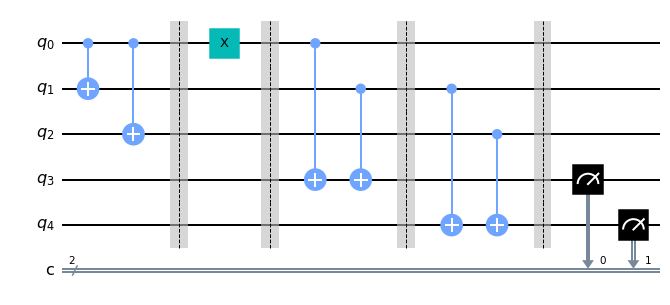

In [5]:
qc.draw('mpl')

## 4. Phase Repetition Code

It is similar to bit encoding with the difference that it encodes the phase of the state and detects phase flips. For a state, $\Psi$, 

$$ 
\Psi = a\hspace{0.2cm}|0\rangle + b\hspace{0.2cm}|1\rangle  \longrightarrow \Psi_P = a\hspace{0.2cm}|+++\rangle + b\hspace{0.2cm}|---\rangle
$$ 


$\Psi_P$ is the bit encoded state. To create $\Psi_P$ from $\Psi$, $CX$(Controlled-X/Controlled-NOT)and $H$(Hadamard) gates can be used.


$$ 
\begin{equation}
\begin{split}
\Psi_P & = H_0H_1H_2CX_{02}CX_{01}|00\rangle(a\hspace{0.2cm}|0\rangle + b\hspace{0.2cm}|1\rangle)\\
       & = H_0H_1H_2CX_{02}CX_{01}(a\hspace{0.2cm}|000\rangle + b\hspace{0.2cm}|001\rangle)\\
       & = a\hspace{0.2cm}H_0H_1H_2CX_{02}CX_{01}|000\rangle + b\hspace{0.2cm}H_0H_1H_2CX_{02}CX_{01}|001\rangle\\
       & = a\hspace{0.2cm}H_0H_1H_2CX_{02}|000\rangle + b\hspace{0.2cm}H_0H_1H_2CX_{02}|011\rangle\\
       & = a\hspace{0.2cm}H_0H_1H_2|000\rangle + b\hspace{0.2cm}H_0H_1H_2|111\rangle\\
       & = a\hspace{0.2cm}|+++\rangle + b\hspace{0.2cm}|---\rangle\\
\end{split}
\end{equation}
$$ 


Phase flip is represented by a $Z$ gate, so if a phase flip occurs on qubit 0,


$$
\begin{equation}
\begin{split}
Z_0 |\Psi_P\rangle & = a\hspace{0.2cm}(Z_0|+++\rangle) + b\hspace{0.2cm}(Z_0|---\rangle)\\
                 & = a\hspace{0.2cm}|-++\rangle + b\hspace{0.2cm}|+--\rangle\\
\end{split}
\end{equation}
$$


For detecting phase flip in the phase repetition code under the same assumption of error and without destroying the encoded state, the operation used this time will be similar to the one used for bit encoded information. 


$$
\text{For comparing qubit 0 and qubit 1 and using qubit 3 as extra qubit}\\[10pt]
\begin{equation}
\begin{split}
H_3CX_{31}CX_{30}H_3|00\rangle(a\hspace{0.2cm}|-++\rangle + b\hspace{0.2cm}|+--\rangle) 
& = a\hspace{0.2cm}H_3CX_{31}CX_{30}|0+-++\rangle + b\hspace{0.2cm}H_3CX_{31}CX_{30}|0++--\rangle\\
& = a\hspace{0.2cm}H_3CX_{31}|0+-++\rangle + b\hspace{0.2cm}H_3CX_{31}|0-+--\rangle\\
& = a\hspace{0.2cm}H_3|0+-++\rangle + b\hspace{0.2cm}H_3|0++--\rangle\\
& = a\hspace{0.2cm}|00-++\rangle + b\hspace{0.2cm}|00+--\rangle
\end{split}\\[20pt]
\text{For comparing qubit 1 and qubit 2 and using qubit 4 as extra qubit}\\[10pt]
\begin{split}
H_4CX_{42}CX_{41}H_4|00\rangle(a\hspace{0.2cm}|-++\rangle + b\hspace{0.2cm}|+--\rangle) 
& = a\hspace{0.2cm}H_4CX_{42}CX_{41}|+0-++\rangle + b\hspace{0.2cm}H_4CX_{42}CX_{41}|+0+--\rangle\\
& = a\hspace{0.2cm}H_4CX_{42}|+0-++\rangle + b\hspace{0.2cm}H_4CX_{42}|-0+--\rangle\\
& = a\hspace{0.2cm}H_4|-0-++\rangle + b\hspace{0.2cm}H_4|-0+--\rangle\\
& = a\hspace{0.2cm}|10-++\rangle + b\hspace{0.2cm}|10+--\rangle
\end{split}\\
\end{equation}
$$


The qubit 3 and 4 can be meausred. In this case, it can be concluded that qubit 2 is flipped using the table giving in Section 3.

In [6]:

## Encoding and Dectection operator

from qiskit import QuantumCircuit

## Phase Encoding
def phase_encoding(circuit):
    circuit.cx(0,1)
    circuit.cx(0,2)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    return circuit

## Phase flip detection
def phaseflip_dection(circuit):
    circuit.h(3)              # comparing 0 and 1
    circuit.cx(3,0)           
    circuit.cx(3,1)
    circuit.h(3)
    circuit.barrier()
    circuit.h(4)              # comparing 1 and 2
    circuit.cx(4,1)           
    circuit.cx(4,2)
    circuit.h(4)
    return circuit

In [7]:
import numpy as np

def error_phase(circuit):
    q = np.random.choice([0,1,2])
    circuit.z(q)
    return circuit

In [8]:
## Encoding and Detection Circuit

qc = QuantumCircuit(5,2)

# Encoding
phase_encoding(qc)
qc.barrier()

# Error 
error_phase(qc)
qc.barrier()

# Detection
phaseflip_dection(qc)
qc.barrier()

# Measurement
qc.measure(3,0)
qc.measure(4,1)

In [9]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
counts = job.result().get_counts()
print(counts)

{'01': 1024}


Again, use the same table to find the flipped qubit. 

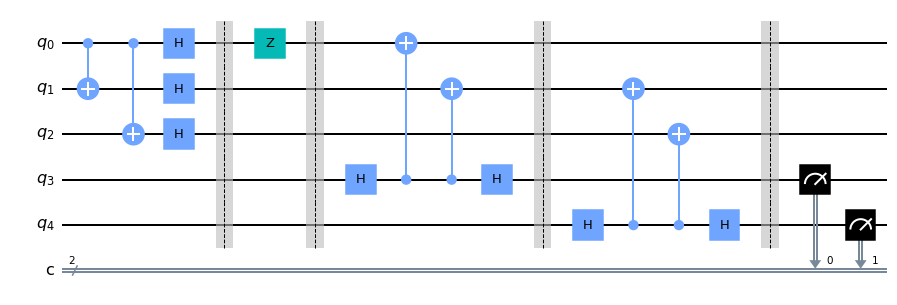

In [10]:
qc.draw('mpl')

# 5. Shor's Encoding

Shor's code uses a combination of phase and bit repetition code to encode the state. It starts with phase encoding on qubits 0, 3, and 6, followed by bit encoding in each phase-encoded qubit using the next 2 qubits. 

In [20]:
## Shor's encoding

def shors_phase_encoding(circuit):
    circuit.cx(0,3)
    circuit.cx(0,6)
    circuit.h(0)
    circuit.h(3)
    circuit.h(6)
    return circuit
    
def shors_bit_encoding(circuit):
    circuit.cx(0,1)
    circuit.cx(0,2)
    circuit.cx(3,4)
    circuit.cx(3,5)
    circuit.cx(6,7)
    circuit.cx(6,8)
    return circuit

Ler's create an error model for shor's code.

In [12]:
## Error model for Shor's code 

import numpy as np

def error_shor(circuit):
    p = np.random.choice([0,1,2,3,4,5,6,7,8])
    q = np.random.choice([0,1,2,3,4,5,6,7,8])
    circuit.x(p)
    circuit.z(q)
    return circuit

In [35]:
# Detection: Bit Flips

def bitflip_dection(circuit):
    circuit.cx(0,9)            # comparing 0 and 1
    circuit.cx(1,9)
    circuit.cx(1,10)           # comparing 1 and 2
    circuit.cx(2,10)
    circuit.barrier()
    
    circuit.cx(3,11)           # comparing 3 and 4
    circuit.cx(4,11)
    circuit.cx(4,12)           # comparing 4 and 5
    circuit.cx(5,12)
    circuit.barrier()
    
    circuit.cx(6,13)           # comparing 6 and 7
    circuit.cx(7,13)
    circuit.cx(7,14)           # comparing 7 and 8
    circuit.cx(8,14)
    return circuit


In [39]:
# Detection: Phase Flips

def phaseflip_dection(circuit):
    circuit.h(15)              # comparing 0,1,2 and 3,4,5
    circuit.cx(15,0)           
    circuit.cx(15,1)
    circuit.cx(15,2)
    circuit.h(15)
    circuit.barrier()
    circuit.h(16)
    circuit.cx(16,3)           
    circuit.cx(16,4)
    circuit.cx(16,5)
    circuit.h(16)
    circuit.barrier()
    
    circuit.h(17)              # comparing 3,4,5 and 6,7,8
    circuit.cx(17,3)           
    circuit.cx(17,4)
    circuit.cx(17,5)
    circuit.h(17)
    circuit.barrier()
    circuit.h(18)
    circuit.cx(18,6)           
    circuit.cx(18,7)
    circuit.cx(18,8)
    circuit.h(18)
    return circuit

In [47]:
qc = QuantumCircuit(19,10)

shors_phase_encoding(qc)
qc.barrier()
shors_bit_encoding(qc)
qc.barrier()
error_shor(qc)
qc.barrier()
bitflip_dection(qc)
qc.barrier()
phaseflip_dection(qc)
qc.barrier()
qc.measure([9,10,11,12,13,14,15,16,17,18],[0,1,2,3,4,5,6,7,8,9])

In [50]:
from qiskit import Aer, execute
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 1024)
counts = job.result().get_counts()
print(counts)

{'1000100000': 1024}


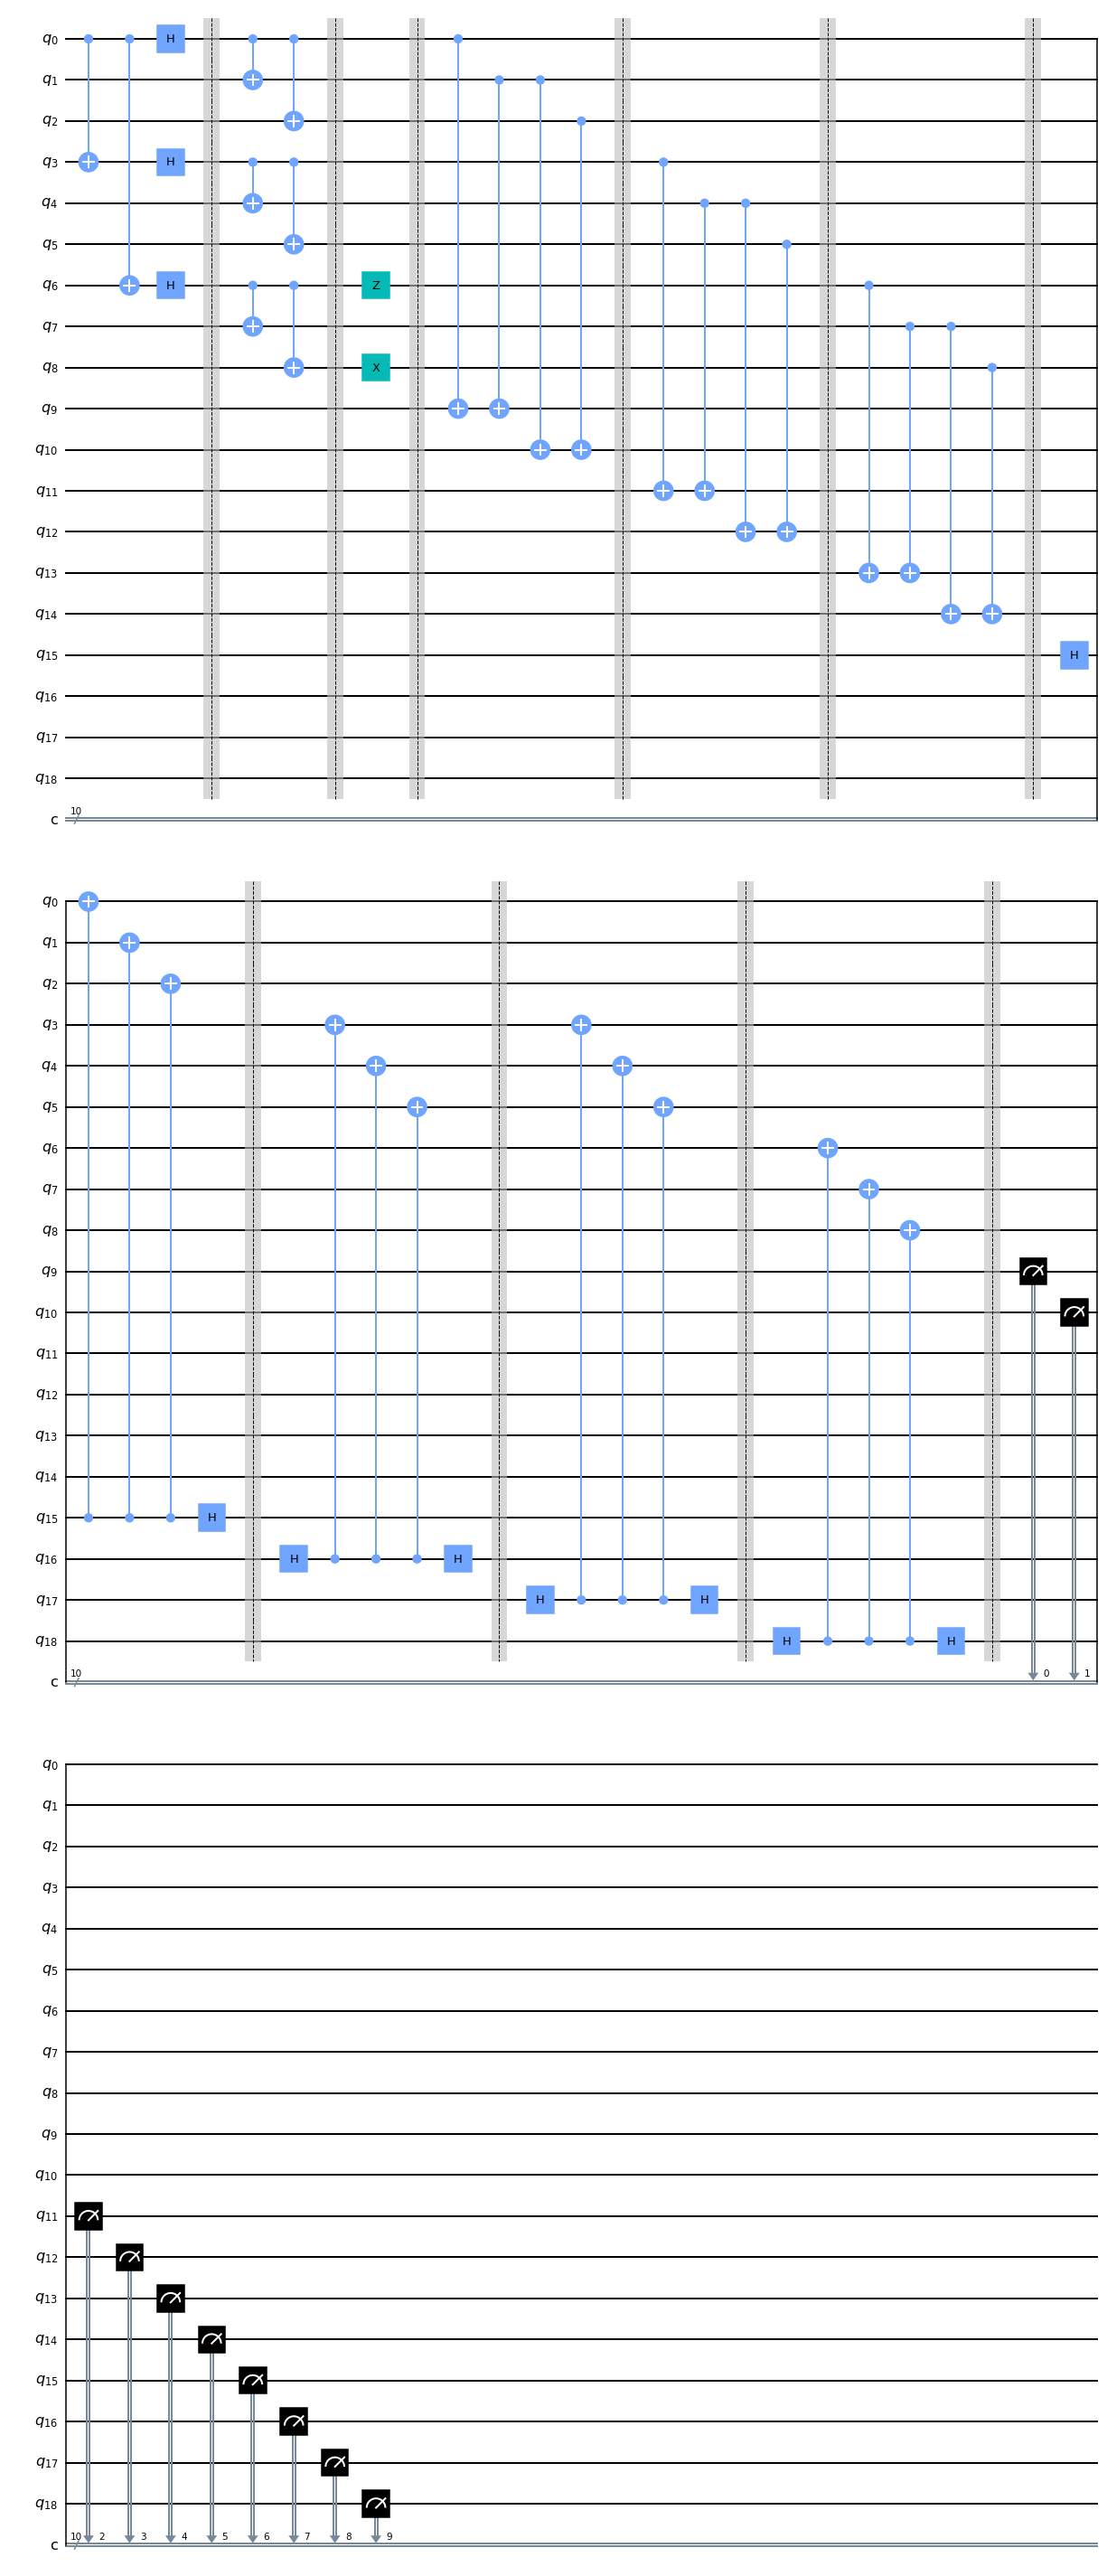

In [48]:
qc.draw('mpl')

## Additional Resources

1. 15 qubit repetition code : https://arxiv.org/abs/1709.00990
2. Stabilizer Codes and Quantum Error Correction : https://arxiv.org/abs/quant-ph/9705052